In [89]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib
import seaborn as sns

## Import Data

In [28]:
vol_data = pd.read_csv('~/Code/giadapi/crypto/raw_data/all_columns_daily_090323.csv',lineterminator='\n')
vol_data

,Unnamed: 0,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price
0,0,2021-01-01,0.083330,0.493347,0.423323,12561.859509,NaN,NaN,NaN,29374.152344
1,1,2021-01-02,0.134531,0.438811,0.426658,30124.352145,NaN,NaN,NaN,32127.267578
2,2,2021-01-03,0.147802,0.428930,0.423267,26167.331282,NaN,NaN,NaN,32782.023438
3,3,2021-01-04,0.104159,0.507274,0.388567,18041.199084,NaN,NaN,NaN,31971.914062
4,4,2021-01-05,0.081743,0.521464,0.396793,17473.551568,NaN,NaN,NaN,33992.429688
...,...,...,...,...,...,...,...,...,...,...
793,793,2023-03-05,0.107813,0.541465,0.350722,14968.952910,0.358301,0.358391,0.363660,22435.513672
794,794,2023-03-06,0.109010,0.507571,0.383419,137824.833122,0.359351,0.359776,0.363419,22429.757812
795,795,2023-03-07,0.123972,0.520640,0.355388,19028.050010,0.360315,0.359762,0.363403,22219.769531
796,796,2023-03-08,0.087879,0.515427,0.396694,19216.616481,0.366446,0.360095,0.364243,21718.080078


In [29]:
tweet_data = pd.read_csv('~/Code/giadapi/crypto/raw_data/cleaned_tweets_without_dupes_120323.csv',lineterminator='\n')
tweet_data

,Unnamed: 0,datetime,username,text,date,negative_bert,neutral_bert,positive_bert
0,0,2021-01-01 22:09:59+00:00,sivilianlife,What's the chances @Grayscale is hedging short...,2021-01-01,0.002040,0.951312,0.046648
1,1,2021-01-01 22:09:39+00:00,LudicrousSpeed9,@CNBC Buy #Bitcoin to hedge against the result...,2021-01-01,0.004157,0.400750,0.595093
2,2,2021-01-01 22:09:35+00:00,SergioBowers1,@APompliano @pepsi @MonsterEnergy $DEO $KO e...,2021-01-01,0.000248,0.582107,0.417644
3,3,2021-01-01 22:09:21+00:00,bitvestor,Closed another chunk of this long now. Remaind...,2021-01-01,0.000974,0.807066,0.191960
4,4,2021-01-01 22:09:18+00:00,FROMKAIWITHLOVE,When you dig deeper into #kardiachain company ...,2021-01-01,0.000056,0.223449,0.776495
...,...,...,...,...,...,...,...,...
347663,347663,2023-03-09 06:00:01+00:00,HourlyBTCUpdate,Bitcoin: $21739.58\n💔 -1.72 last 1 Hour (-0.01...,2023-03-09,0.001016,0.870834,0.128149
347664,347664,2023-03-09 06:00:01+00:00,Mannny23,Popular crypto latest prices:\n $BTC 21751.00\...,2023-03-09,0.003519,0.907121,0.089360
347665,347665,2023-03-09 06:00:01+00:00,whalesradar_com,#CTXCUSDT #CTXC \nSignal #4 \n\nLast Signal: ...,2023-03-09,0.000521,0.964454,0.035024
347666,347666,2023-03-09 06:00:00+00:00,croxroadnews,The Wings of #Bitcoin: A Symbol of Strength an...,2023-03-09,0.007388,0.532228,0.460384


## Functions for Pages

### First Page Functions (Main Page)

In [94]:
def main_score(vol_data):
    pos = vol_data.columns.get_loc("positive_bert")
    sentiment_signal = vol_data.iloc[-1,pos]
    return sentiment_signal

In [95]:
main_score(vol_data)

0.3031625991830986

In [11]:
def sentiment_score(data):
    pos = data.columns.get_loc("positive_bert")
    sentiment_signal = data.iloc[-1,pos]
    return sentiment_signal

In [30]:
sentiment_score = sentiment_score(vol_data)

0.3031625991830986

In [8]:
def volume_signal(data):
    vol = data.columns.get_loc("daily_tweets")
    volume_signal = data.iloc[-1,vol]
    return volume_signal

In [31]:
volume_signal(vol_data)

11235.164835164836

In [ ]:
# Hold for time Signal

### Sentiment Page

In [93]:
# do we need to consider the sorting of date values?
def sentiment_buy(tweet_data,start_date,end_date=None):
    pos = tweet_data.columns.get_loc("positive_bert")
    tweet = tweet_data.columns.get_loc("text")
    start_date_index = tweet_data.index[tweet_data['date']==start_date].min()
    if end_date == None:
        temp = tweet_data.iloc[start_date_index:,:]
        max_1 = temp['positive_bert'].idxmax()
        temp.drop(max_1,inplace=True)
        max_2 = temp['positive_bert'].idxmax()
        temp.drop(max_2,inplace=True)
        max_3 = temp['positive_bert'].idxmax()
        temp.drop(max_3,inplace=True)
        sentiment_buy_example_1 = tweet_data.iloc[max_1,tweet]
        sentiment_buy_example_2 = tweet_data.iloc[max_2,tweet]
        sentiment_buy_example_3 = tweet_data.iloc[max_3,tweet]
        sentiment_buy_score_1 = tweet_data.iloc[max_1,pos]
        sentiment_buy_score_2 = tweet_data.iloc[max_2,pos]
        sentiment_buy_score_3 = tweet_data.iloc[max_3,pos]
        return sentiment_buy_example_1,sentiment_buy_example_2,sentiment_buy_example_3,sentiment_buy_score_1,sentiment_buy_score_2,sentiment_buy_score_3
    else:
        end_date_index = tweet_data.index[tweet_data['date']==end_date].max()
        temp = tweet_data.iloc[start_date_index:end_date_index+1,:]
        max_1 = temp['positive_bert'].idxmax()
        temp.drop(max_1,inplace=True)
        max_2 = temp['positive_bert'].idxmax()
        temp.drop(max_2,inplace=True)
        max_3 = temp['positive_bert'].idxmax()
        temp.drop(max_3,inplace=True)
        sentiment_buy_example_1 = tweet_data.iloc[max_1,tweet]
        sentiment_buy_example_2 = tweet_data.iloc[max_2,tweet]
        sentiment_buy_example_3 = tweet_data.iloc[max_3,tweet]
        sentiment_buy_score_1 = tweet_data.iloc[max_1,pos]
        sentiment_buy_score_2 = tweet_data.iloc[max_2,pos]
        sentiment_buy_score_3 = tweet_data.iloc[max_3,pos]
        return sentiment_buy_example_1,sentiment_buy_example_2,sentiment_buy_example_3,sentiment_buy_score_1,sentiment_buy_score_2,sentiment_buy_score_3
        
        

In [74]:
sentiment_buy(tweet_data,start_date='2023-03-04',end_date='2023-03-06')

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_4653/933685923.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(max_1,inplace=True)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_4653/933685923.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(max_2,inplace=True)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_4653/933685923.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


('🚨💥 Weekly Bitcoin Clickbait!\n\n✅EU bans #Bitcoin self custody wallets… dur \n✅Hong Kong to be #BTC hub\n✅German Bank custody services \n✅Montana passes right to mine!\n\nCheck it out!\n\nhttps://t.co/EhXHe1juVJ https://t.co/2TFoRdPXtp\r',
 '"The Ouroboros paper that kicks off #Cardano is the second most cited paper in Crypto. Only behind #bitcoin whitepaper." 🤯\r',
 '@rovercrc less and less supply circulating with demand continuously rising\n\n#Bitcoin will pamp faster than ever before\r',
 0.88158226,
 0.8812364,
 0.87973994)

In [92]:
def sentiment_sell(tweet_data,start_date,end_date=None):
    pos = tweet_data.columns.get_loc("negative_bert")
    tweet = tweet_data.columns.get_loc("text")
    start_date_index = tweet_data.index[tweet_data['date']==start_date].min()
    if end_date == None:
        temp = tweet_data.iloc[start_date_index:,:]
        max_1 = temp['negative_bert'].idxmax()
        temp.drop(max_1,inplace=True)
        max_2 = temp['negative_bert'].idxmax()
        temp.drop(max_2,inplace=True)
        max_3 = temp['negative_bert'].idxmax()
        temp.drop(max_3,inplace=True)
        sentiment_buy_example_1 = tweet_data.iloc[max_1,tweet]
        sentiment_buy_example_2 = tweet_data.iloc[max_2,tweet]
        sentiment_buy_example_3 = tweet_data.iloc[max_3,tweet]
        sentiment_buy_score_1 = tweet_data.iloc[max_1,pos]
        sentiment_buy_score_2 = tweet_data.iloc[max_2,pos]
        sentiment_buy_score_3 = tweet_data.iloc[max_3,pos]
        return sentiment_buy_example_1,sentiment_buy_example_2,sentiment_buy_example_3,sentiment_buy_score_1,sentiment_buy_score_2,sentiment_buy_score_3
    else:
        end_date_index = tweet_data.index[tweet_data['date']==end_date].max()
        temp = tweet_data.iloc[start_date_index:end_date_index+1,:]
        max_1 = temp['negative_bert'].idxmax()
        temp.drop(max_1,inplace=True)
        max_2 = temp['negative_bert'].idxmax()
        temp.drop(max_2,inplace=True)
        max_3 = temp['negative_bert'].idxmax()
        temp.drop(max_3,inplace=True)
        sentiment_buy_example_1 = tweet_data.iloc[max_1,tweet]
        sentiment_buy_example_2 = tweet_data.iloc[max_2,tweet]
        sentiment_buy_example_3 = tweet_data.iloc[max_3,tweet]
        sentiment_buy_score_1 = tweet_data.iloc[max_1,pos]
        sentiment_buy_score_2 = tweet_data.iloc[max_2,pos]
        sentiment_buy_score_3 = tweet_data.iloc[max_3,pos]
        return sentiment_buy_example_1,sentiment_buy_example_2,sentiment_buy_example_3,sentiment_buy_score_1,sentiment_buy_score_2,sentiment_buy_score_3

In [76]:
sentiment_sell(tweet_data,start_date='2023-03-04',end_date='2023-03-06')

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_4653/1317514203.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(max_1,inplace=True)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_4653/1317514203.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(max_2,inplace=True)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_4653/1317514203.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

('@ercwl No matter how hard you try, you’ll never make jpegs on #Bitcoin a thing.\r',
 '#BTC #Bitcoin 1d\n\nOn the critical supports. 🧐🐻🧐 https://t.co/zOxliJdjo8\r',
 'Well that pump was nice while it lasted hahahThis is my sell notification.  #BitcoinButton #Bitcoin #BTC\r',
 0.99678135,
 0.9918743,
 0.98799443)

### Volume Page

In [84]:
def volume_today_no_tweet(vol_data):
    daily_tweets = vol_data.columns.get_loc("daily_tweets")
    volume_today_no_tweet = vol_data.iloc[-1,daily_tweets]
    return volume_today_no_tweet

In [86]:
volume_today_no_tweet(vol_data)

11235.164835164836

### Historical

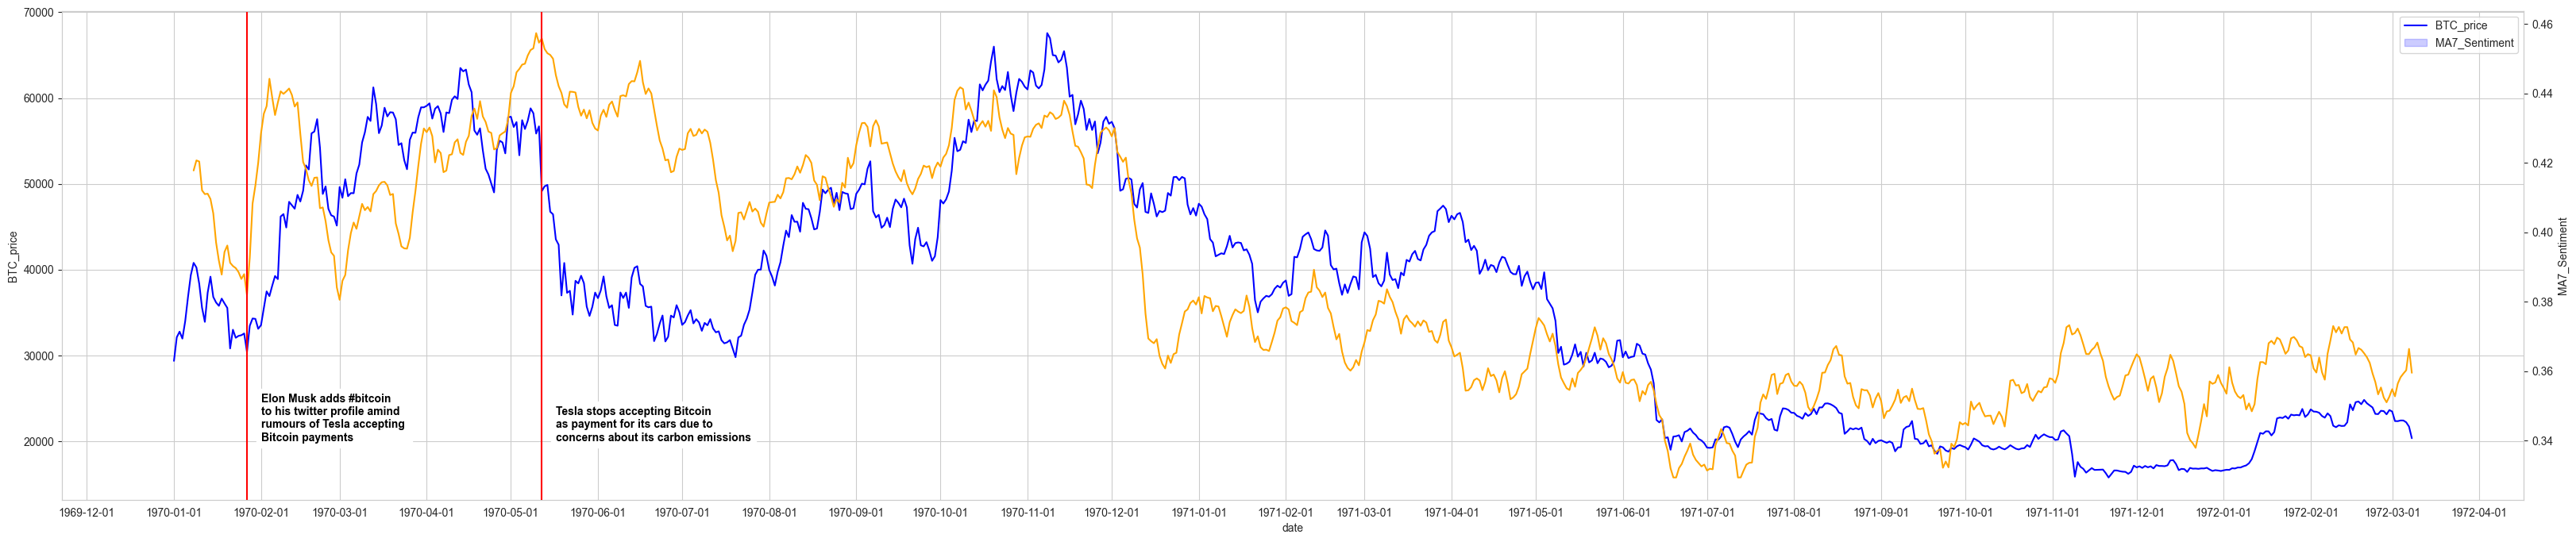

In [91]:
# Do we have to save the file
matplotlib.rc_file_defaults()

elon_add_BTC = vol_data['date'][26]
elon_add_BTC_anno = vol_data['date'][31]
elon_add_BTC_text = '''Elon Musk adds #bitcoin 
to his twitter profile amind 
rumours of Tesla accepting 
Bitcoin payments'''
elon_lose_BTC = vol_data['date'][131]
elon_lose_BTC_anno = vol_data['date'][136]
elon_lose_BTC_text = '''Tesla stops accepting Bitcoin 
as payment for its cars due to 
concerns about its carbon emissions'''

ax1 = sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(40,8))

sns.lineplot(x = vol_data['date'], y=vol_data['BTC_price'], sort = False, color='blue',legend='brief')

ax2 = ax1.twinx()
sns.lineplot(x = vol_data['date'], y=vol_data['MA7_Sentiment'], sort = False, ax=ax2, color='orange',legend='brief').set_xticklabels
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax2.axvline(elon_add_BTC, color = 'red')
ax2.axvline(elon_lose_BTC, color = 'red')

ax1.legend(vol_data[['BTC_price','MA7_Sentiment']], loc='upper right')

plt.text(x=elon_add_BTC_anno, y=0.34,s=elon_add_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')
plt.text(x=elon_lose_BTC_anno, y=0.34,s=elon_lose_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')

plt.grid()